In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

all_data = pd.read_csv('data\\public_admet_data.csv')
all_data = all_data.drop(columns=['Dog_fraction_unbound_plasma', 'Human_fraction_unbound_plasma', 'Monkey_fraction_unbound_plasma', 
                                  'Rat_fraction_unbound_plasma', 'kinetic_logSaq', 'thermo_logSaq',
                                  'VDss_dog', 'VDss_human', 'VDss_monkey', 'VDss_rat'])
df_trainval = all_data.iloc[:12000]
df_labeled = all_data.iloc[12000:]

df_trainval.to_csv('data\\ADMET_trainval.csv') # for training DeepPurpose models
df_labeled.to_csv('data\\ADMET_labeled.csv') # for calibration and test

In [2]:
assays = df_trainval.columns.to_list()
assays.remove('smiles')
print(len(assays), assays)

15 ['CL_microsome_human', 'CL_microsome_mouse', 'CL_microsome_rat', 'CL_total_dog', 'CL_total_human', 'CL_total_monkey', 'CL_total_rat', 'CYP2C8_inhibition', 'CYP2C9_inhibition', 'CYP2D6_inhibition', 'CYP3A4_inhibition', 'Papp_Caco2', 'Pgp_human', 'hERG_binding', 'LogD_pH_7.4']


In [3]:
df_train = df_trainval.iloc[:10000]
df_val = df_trainval.iloc[10000:]

In [16]:
from DeepPurpose import CompoundPred, utils
from utility import thresholds

def create_df(df, method):
    # use utils.data_process to generate (y_dim) dataframes
    all_responses = utils.data_process(X_drug = df.smiles.values, y = df.drop(columns='smiles').to_numpy(), drug_encoding = 'Morgan', split_method = 'no_split')
    Y = all_responses['Label'].to_list()
    Y = np.array(Y)
    if method != 'binary':
        res = []
        for i, a in enumerate(assays):
            df_i = all_responses.copy(deep=True)
            if method == 'decomp':
                df_i['Label'] = Y[:, i]
            if method == 'bin_decomp':
                df_i['Label'] = (Y[:, i] > thresholds[a]) * 1
            res.append(df_i)
        return res
    if method == 'binary':
        df_all = all_responses.copy(deep=True)
        df_all['Label'] = (Y > np.array(list(thresholds.values()))).all(axis=1) * 1
        return df_all

In [48]:
train, val, labeled = create_df(df_train, 'decomp'), create_df(df_val, 'decomp'), create_df(df_labeled, 'decomp')

Drug Property Prediction Mode...
in total: 10000 drugs
encoding drug...
unique drugs: 10000


[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerator
[07:52:08] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 2000 drugs
encoding drug...
unique drugs: 2000


[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 10805 drugs
encoding drug...
unique drugs: 10805


[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerator
[07:52:13] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data


In [50]:
labeled[0]

SMILES   Label  \
0      Cc1cc(Nc2nc(N[C@@H](C)c3ccc(F)cn3)c(C#N)cc2F)n...  4.2353   
1                        CCN(Cc1ccccc1)C(=O)CSc1ncn[nH]1  4.1530   
2             CSc1ccc(C2CC(=O)Nc3c2c(=O)n(C)c(=O)n3C)cc1  4.2700   
3             Cn1c(=O)oc2cc(S(=O)(=O)N3CCc4ccccc43)ccc21  4.5608   
4      CCCS(=O)(=O)Nc1cccc(CC(=O)Nc2nc(-c3c[nH]c4nccc...  4.4682   
...                                                  ...     ...   
10800  O=C(NC1CCN(Cc2ccc3c(c2)OC(F)(F)O3)CC1)c1cc(=O)...  4.4988   
10801               COC(=O)c1c(C)oc(C)c1S(=O)(=O)N1CCCC1  4.0823   
10802                    O=C(NN=CC(Cl)=Cc1ccccc1)c1cccs1  4.2364   
10803                   COC(=O)c1sccc1NC(=O)Nc1ccc(F)cc1  4.7318   
10804  Cc1ccc(-n2c(-c3ncccc3Cl)nc(CNC3CCC(F)C3)c2C(C)...  4.0437   

                                           drug_encoding  
0      [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                  ...  
10800  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
10801  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
10802  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
10803  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
10804  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[10805 rows x 3 columns]

In [59]:
encodings = np.array(labeled[0]['drug_encoding'].to_list())
encodings

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [65]:
# save the drug encodings

df_features = labeled[0].copy(deep=True).drop(columns='drug_encoding')

df_features = pd.concat((df_features, pd.DataFrame(encodings)), axis=1)
df_features.to_csv('data\\ADMET_features.csv')

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 19.5763. Total time 0.0 hours
Validation at Epoch 1 , MSE: 0.27273 , Pearson Correlation: 0.21673 with p-value: 1.09E-22 , Concordance Index: 0.56805
Training at Epoch 2 iteration 0 with loss 0.32661. Total time 0.00055 hours
Validation at Epoch 2 , MSE: 0.15765 , Pearson Correlation: 0.33114 with p-value: 2.18E-52 , Concordance Index: 0.61481
Training at Epoch 3 iteration 0 with loss 0.15607. Total time 0.00138 hours
Validation at Epoch 3 , MSE: 0.12912 , Pearson Correlation: 0.51876 with p-value: 3.30E-138 , Concordance Index: 0.67978
Training at Epoch 4 iteration 0 with loss 0.13701. Total time 0.00222 hours
Validation at Epoch 4 , MSE: 0.11315 , Pearson Correlation: 0.60354 with p-value: 8.82E-199 , Concordance Index: 0.71188
Training at Epoch 5 iteration 0 with loss 0.12109. Total time 0.00305 hours
Validation at Epoch 5 , MSE: 0.10505 , Pearson Correlation: 0.63106 with p-v

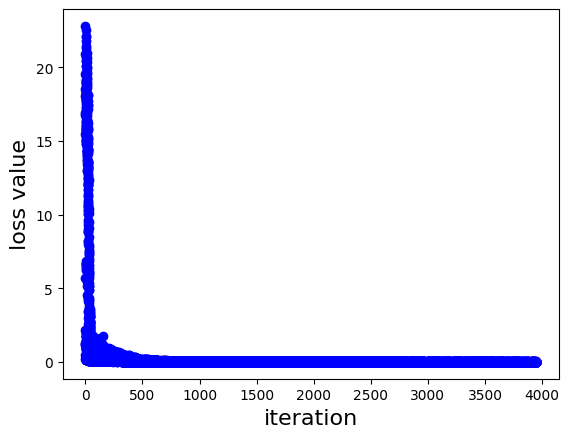

In [20]:
# build multiple models separately for each assay

for i, a in enumerate(assays):
    config = utils.generate_config(drug_encoding = 'Morgan', 
                                   train_epoch = 50, 
                                   batch_size = 128)
    model = CompoundPred.model_initialize(**config)
    model.train(train[i], val[i])
    model.save_model(f'regr_morgan\\model_{i}')

In [21]:
df_labeled_pred = pd.DataFrame()

for i, a in enumerate(assays):
    model = CompoundPred.model_pretrained(f'regr_morgan\\model_{i}')
    labeled_pred = model.predict(labeled[i])

    df_labeled_pred[assays[i]] = labeled_pred

df_labeled_pred.to_csv('data\\ADMET_labeled_pred.csv')

c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


In [43]:
train, val, labeled = create_df(df_train, 'bin_decomp'), create_df(df_val, 'bin_decomp'), create_df(df_labeled, 'bin_decomp')

Drug Property Prediction Mode...
in total: 10000 drugs
encoding drug...
unique drugs: 10000


[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerator
[21:28:31] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 2000 drugs
encoding drug...
unique drugs: 2000


[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerator
[21:28:34] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 10805 drugs
encoding drug...
unique drugs: 10805


[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerator
[21:28:35] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68974. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.74854 , AUPRC: 0.88428 , F1: 0.84393
Training at Epoch 2 iteration 0 with loss 0.56440. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.81370 , AUPRC: 0.92002 , F1: 0.86323
Training at Epoch 3 iteration 0 with loss 0.40849. Total time 0.00138 hours
Validation at Epoch 3 , AUROC: 0.82232 , AUPRC: 0.92360 , F1: 0.86180
Training at Epoch 4 iteration 0 with loss 0.26993. Total time 0.00194 hours
Validation at Epoch 4 , AUROC: 0.83209 , AUPRC: 0.92757 , F1: 0.86638
Training at Epoch 5 iteration 0 with loss 0.20357. Total time 0.00277 hours
Validation at Epoch 5 , AUROC: 0.84129 , AUPRC: 0.93118 , F1: 0.87159
Training at Epoch 6 iteration 0 with loss 0.12301. Total time 0.00333 hours
Validation at Epoch 6 , AUROC: 0.84676 , AUPRC: 0.93370 , F1: 0.87129
Training at Epoch 7 iteration 0 with loss 0.01971. Total time 

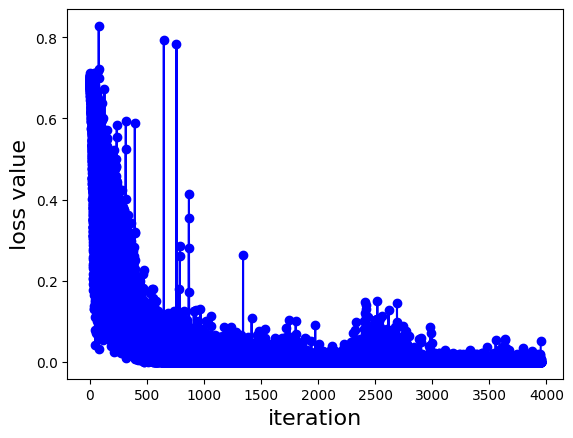

In [34]:
# build multiple models separately for each assay

for i, a in enumerate(assays):
    config = utils.generate_config(drug_encoding = 'Morgan', 
                                   train_epoch = 50, 
                                   batch_size = 128)
    model = CompoundPred.model_initialize(**config)
    model.train(train[i], val[i])
    model.save_model(f'classif_morgan\\model_{i}')

In [44]:
df_labeled_classif = pd.DataFrame()

for i, a in enumerate(assays):
    model = CompoundPred.model_pretrained(f'classif_morgan\\model_{i}')
    labeled_pred = model.predict(labeled[i])

    df_labeled_classif[assays[i]] = labeled_pred

df_labeled_classif.to_csv('data\\ADMET_labeled_classif.csv')

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...


In [66]:
train, val, labeled = create_df(df_train, 'binary'), create_df(df_val, 'binary'), create_df(df_labeled, 'binary')

Drug Property Prediction Mode...
in total: 10000 drugs
encoding drug...
unique drugs: 10000


[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerator
[20:02:00] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 2000 drugs
encoding drug...
unique drugs: 2000


[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerator
[20:02:05] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 10805 drugs
encoding drug...
unique drugs: 10805


[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerator
[20:02:06] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69242. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.56331 , AUPRC: 0.23383 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.58952. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.63287 , AUPRC: 0.31367 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.48259. Total time 0.00138 hours
Validation at Epoch 3 , AUROC: 0.66322 , AUPRC: 0.34394 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.38716. Total time 0.00194 hours
Validation at Epoch 4 , AUROC: 0.67227 , AUPRC: 0.35521 , F1: 0.22673
Training at Epoch 5 iteration 0 with loss 0.29942. Total time 0.00277 hours
Validation at Epoch 5 , AUROC: 0.68092 , AUPRC: 0.36237 , F1: 0.31290
Training at Epoch 6 iteration 0 with loss 0.12291. Total time 0.00361 hours
Validation at Epoch 6 , AUROC: 0.69379 , AUPRC: 0.37525 , F1: 0.36710
Training at Epoch 7 iteration 0 with loss 0.09468. Total time 0.00416 hour

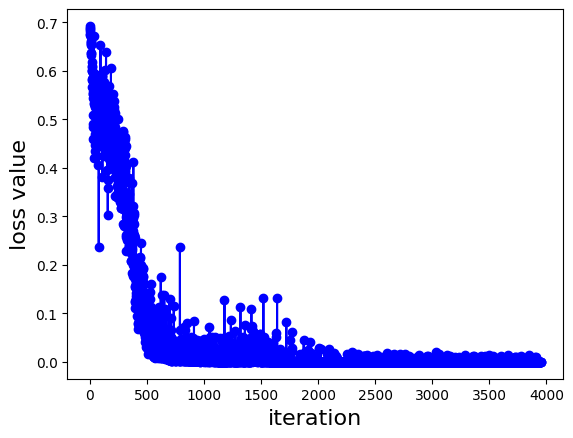

In [39]:
config = utils.generate_config(drug_encoding = 'Morgan', 
                                train_epoch = 50, 
                                batch_size = 128)
model = CompoundPred.model_initialize(**config)
model.train(train, val)
model.save_model(f'bin_morgan\\model')

In [41]:
df_labeled_bin = pd.DataFrame()

model = CompoundPred.model_pretrained(f'bin_morgan\\model')
labeled_pred = model.predict(labeled)

df_labeled_bin['prob'] = labeled_pred

df_labeled_bin.to_csv('data\\ADMET_labeled_bin.csv')

c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\DeepPurpose\CompoundPred.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.loa

predicting...
